In [ ]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("/content/games.csv")

In [3]:
lab = LabelEncoder()

data['W/L']=lab.fit_transform(data['RESULT'])
data['Starter']=lab.fit_transform(data['STARTER'])

data = data.drop("GAME_ID", axis = 1)
data = data.drop("TEAM", axis = 1)
data = data.drop("OPPT", axis = 1)
data = data.drop("RESULT", axis = 1)
data = data.drop("PLAYER", axis = 1)
data = data.drop("STARTER", axis = 1)

data['MP'] = data['MP'].astype('int')

def findbound(data, feature):
    Q1 = data[feature].quantile(.25)
    Q3 = data[feature].quantile(.75)
    IQR = Q3 - Q1
    l_bound = Q1 - 1.5 * IQR
    u_bound = Q3 + 1.5 * IQR
    return l_bound, u_bound

l_b, u_b = findbound(data, 'PTS')

outliers = np.where(data['PTS'] > u_b, True, np.where(data['PTS'] < l_b, True, False))

data = data.loc[~(outliers),]

l_b, u_b = findbound(data, 'FGA')
outliers = np.where(data['FGA'] > u_b, True, np.where(data['FGA'] < l_b, True, False))

data = data.loc[~(outliers),]

outliers = np.where(data['PTS'] > 30, True, np.where(data['PTS'] < 0, True, False))
data = data.loc[~(outliers),]

In [4]:
data = data.iloc[:100000]

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 102628
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   TEAM_SCORE  100000 non-null  int64
 1   OPPT_SCORE  100000 non-null  int64
 2   SCORE_DIFF  100000 non-null  int64
 3   MP          100000 non-null  int64
 4   FG          100000 non-null  int64
 5   FGA         100000 non-null  int64
 6   FG3         100000 non-null  int64
 7   FG3A        100000 non-null  int64
 8   FT          100000 non-null  int64
 9   FTA         100000 non-null  int64
 10  ORB         100000 non-null  int64
 11  DRB         100000 non-null  int64
 12  TRB         100000 non-null  int64
 13  AST         100000 non-null  int64
 14  STL         100000 non-null  int64
 15  BLK         100000 non-null  int64
 16  TOV         100000 non-null  int64
 17  PF          100000 non-null  int64
 18  PLUS_MINUS  100000 non-null  int64
 19  PTS         100000 non-null  int64
 20  TOTA

# Univariate linear regression

Univariate linear regression R^2:  0.7168365599165089
Lin reg exec time:  0.01358485221862793


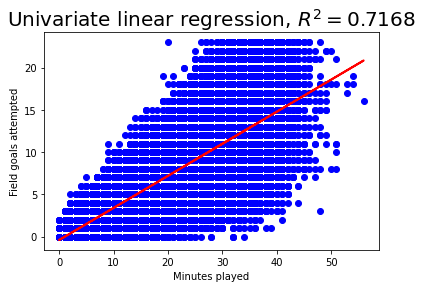

In [ ]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
#stnd = StandardScaler()
#X = stnd.fit_transform(X)
model = LinearRegression().fit(X,y)
y_pred = model.predict(X)
r_sq = model.score(X,y)
print("Univariate linear regression R^2: ", r_sq)
exec_time = time.time() - start
print("Lin reg exec time: ", exec_time)

plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel("Minutes played")
plt.ylabel("Field goals attempted")
plt.title('Univariate linear regression, $R^2 = %.4f$' % r_sq, fontsize=20)
plt.show()

# Univariate linear regression with splitted dataset

Univariate linear regression splited dataset R^2 :  0.7166562492841991
Lin reg splitted dataset exec time:  0.059708595275878906


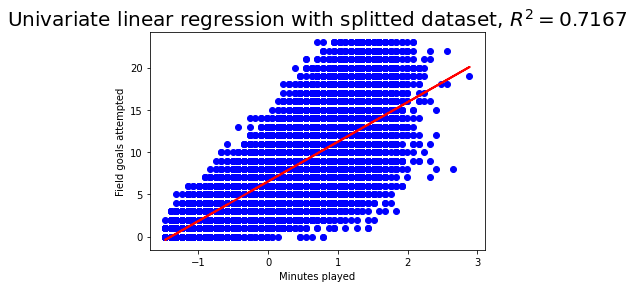

In [13]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
stnd = StandardScaler()
X_train = stnd.fit_transform(X_train)
X_test = stnd.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Univariate linear regression splited dataset R^2 : ', metrics.r2_score(y_test, y_pred))
exec_time = time.time() - start
print("Lin reg splitted dataset exec time: ", exec_time)

plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Univariate linear regression with splitted dataset, $R^2 = %.4f$' % metrics.r2_score(y_test, y_pred), fontsize=20)
plt.xlabel("Minutes played")
plt.ylabel("Field goals attempted")
plt.show()

# OLS

In [14]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
model2 = sm.OLS(y, X)
rezreg = model2.fit()
print(rezreg.summary()) 
exec_time = time.time() - start
print("OLS exec time: ", exec_time)

                                 OLS Regression Results                                
Dep. Variable:                    FGA   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          7.389e+05
Date:                Sun, 04 Dec 2022   Prob (F-statistic):                        0.00
Time:                        12:57:29   Log-Likelihood:                     -2.5034e+05
No. Observations:              100000   AIC:                                  5.007e+05
Df Residuals:                   99999   BIC:                                  5.007e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Multivariate linear regression

R^2 Linear multivariate:  0.8519306996384368
Lin multi reg exec time:  0.03317880630493164




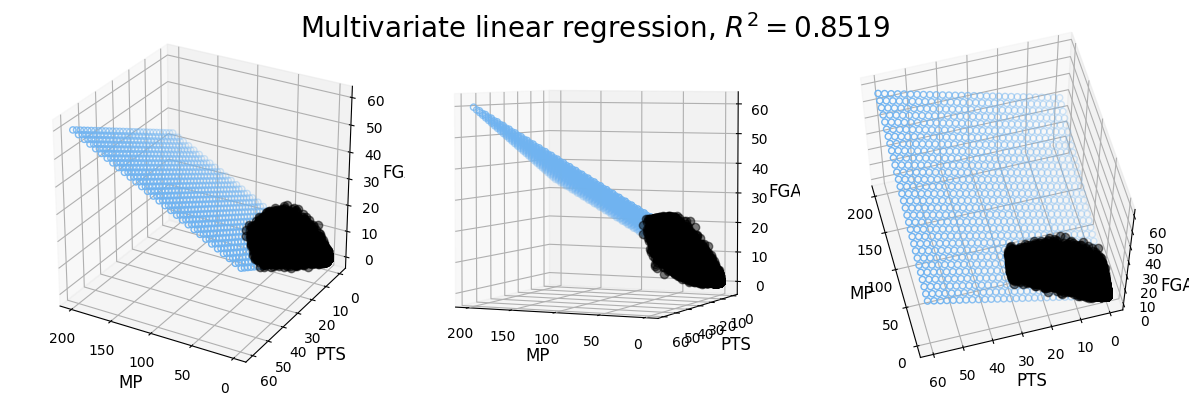

In [15]:
start = time.time()
X = data[['MP', 'PTS']].values.reshape(-1, 2)
Y = data['FGA']
x = X[:, 0]
y = X[:, 1]
z = Y
x_p = np.linspace(0, 200, 30)
y_p = np.linspace(0, 60, 30)
xx_p, yy_p = np.meshgrid(x_p, y_p)
model_viz = np.array([xx_p.flatten(), yy_p.flatten()]).T
model = LinearRegression().fit(X,Y)
y_pred = model.predict(X)
r_sq = model.score(X,Y)
predicted = model.predict(model_viz)
print("R^2 Linear multivariate: ", r_sq)
exec_time = time.time() - start
print("Lin multi reg exec time: ", exec_time)
print("\n")

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_p.flatten(), yy_p.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('MP', fontsize=12)
    ax.set_ylabel('PTS', fontsize=12)
    ax.set_zlabel('FGA', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Multivariate linear regression, $R^2 = %.4f$' % r_sq, fontsize=20)

fig.tight_layout()
plt.show()

# Univariate polynomial regression

Poly univariate R^2:  0.7230738512533762
Univariate poly reg exec time:  0.06248736381530762


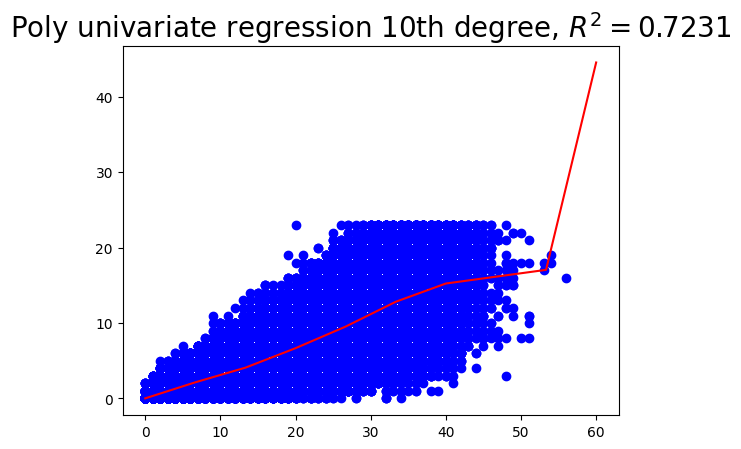

In [16]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, y)
y_pred_poly = reg.predict(X_poly)
r_sq = reg.score(X_poly, y)
print("Poly univariate R^2: ", r_sq)
exec_time = time.time() - start
print("Univariate poly reg exec time: ", exec_time)

X_plot = np.linspace(0,60,10).reshape(-1,1)
X_plot_poly = poly.fit_transform(X_plot)
plt.scatter(X,y, color='blue')
plt.plot(X_plot_poly[:, 0], reg.predict(X_plot_poly), color='red')
plt.title('Poly univariate regression 10th degree, $R^2 = %.4f$' % r_sq, fontsize=20)
plt.show()

# Multivariate polynomial regression


POLY Multivariate R^2:  0.8526744097340679
Multivariate poly reg exec time:  0.6795823574066162




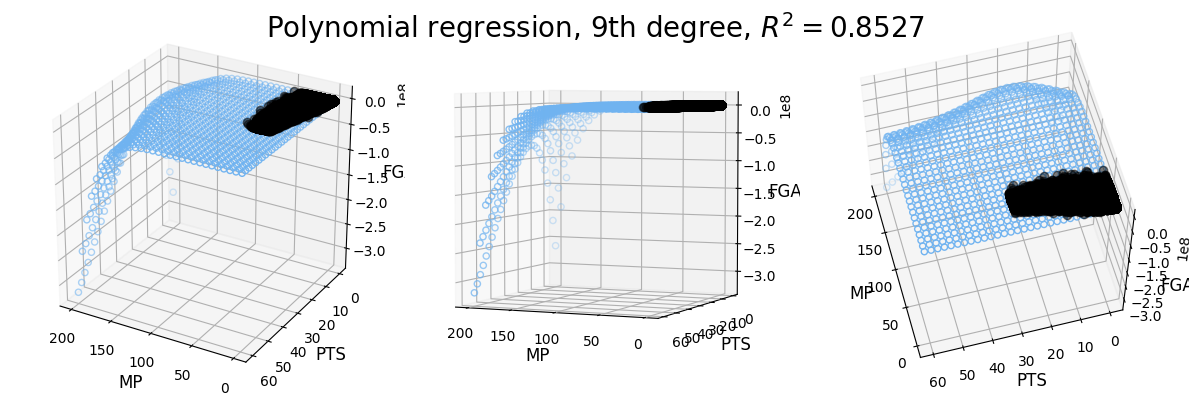

In [17]:
start = time.time()
X = data[['MP', 'PTS']].values.reshape(-1, 2)
Y = data['FGA']
x = X[:, 0]
y = X[:, 1]
z = Y
x_p = np.linspace(0, 200, 30)
y_p = np.linspace(0, 60, 30)
xx_p, yy_p = np.meshgrid(x_p, y_p)
model_viz = np.array([xx_p.flatten(), yy_p.flatten()]).T
poly = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, Y)
y_pred_poly = reg.predict(X_poly)
predicted = reg.predict(poly.fit_transform(model_viz))
r_sq = reg.score(X_poly,Y)
print("\nPOLY Multivariate R^2: ", reg.score(X_poly,Y))
exec_time = time.time() - start
print("Multivariate poly reg exec time: ", exec_time)
print("\n")

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_p.flatten(), yy_p.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('MP', fontsize=12)
    ax.set_ylabel('PTS', fontsize=12)
    ax.set_zlabel('FGA', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Polynomial regression, 9th degree, $R^2 = %.4f$' % r_sq, fontsize=20)

fig.tight_layout()
plt.show()

# Ridge

In [18]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']

rmodel = Ridge(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
rmodel.fit(X_train,y_train)
y_pred = rmodel.predict(X_test)
mse = np.mean((y_pred-y_test)**2)
r_sq = rmodel.score(X_test,y_test)
print("Ridge R^2: ", r_sq)
exec_time = time.time() - start
print("Ridge exec time: ", exec_time)
print("\n")

Ridge R^2:  0.716656249264487
Ridge exec time:  0.0314335823059082




# Lasso

In [19]:
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']

start = time.time()
lmodel = Lasso(alpha=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
lmodel.fit(X_train,y_train)
y_pred = lmodel.predict(X_test) 
print("Lasso R^2: ", lmodel.score(X_test, y_test))
exec_time = time.time() - start
print("Lasso exec time: ", exec_time)
print("\n")

Lasso R^2:  0.7166520799191645
Lasso exec time:  0.030445337295532227




# Elasticnet

In [20]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
Enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
Enet = Enet.fit(X_train, y_train)
y_predict = Enet.predict(X_test)
print("ElasticNet R^2: ", Enet.score(X_test, y_test))
exec_time = time.time() - start
print("ElasticNet exec time: ", exec_time)
print("\n")


ElasticNet R^2:  0.7165063049970547
ElasticNet exec time:  0.02519059181213379




In [ ]:
start=time.time()

X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = SVR()
reg.fit(X_train, y_train)
print("Default regression score: ", reg.score(X_test, y_test))
print("Time of execution: ", time.time() - start, "seconds")

Default regression score:  0.7212857513608553
Time of execution:  237.88459539413452 seconds


# SVR Kernel test

Regression with kernel  linear and score:  0.7127001601799997
Time of execution:  354.6275107860565 seconds
Regression with kernel  poly and score:  0.5955668381718753
Time of execution:  1648.4259049892426 seconds
Regression with kernel  sigmoid and score:  -137017.92136434338
Time of execution:  360.06326627731323 seconds
Regression with kernel  rbf and score:  0.7212857513608553
Time of execution:  241.22344136238098 seconds


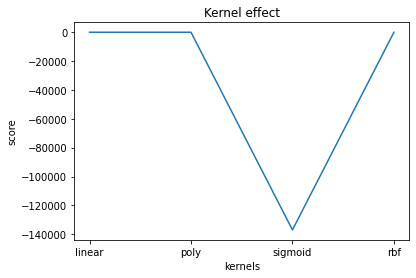

In [ ]:
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = SVR(C=1, cache_size=200, epsilon=0.1, kernel='rbf')
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
scores = []

for kernel in kernels:
    start_time = time.time()
    reg.set_params(kernel = kernel)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("Regression with kernel ", kernel, "and score: ", score)
    print("Time of execution: ", time.time() - start_time, "seconds")
    scores.append(reg.score(X_test, y_test))

plt.plot(kernels, scores)
plt.title("Kernel effect")
plt.xlabel("kernels")
plt.ylabel("score")
plt.show()

# SVR Epsilon test

Regression with epsilon  0 and score:  0.7213511622260207
Time of execution:  277.22791147232056 seconds
Regression with epsilon  0.01 and score:  0.7212995552063458
Time of execution:  670.025139093399 seconds
Regression with epsilon  0.1 and score:  0.7212857513608553
Time of execution:  239.8785696029663 seconds
Regression with epsilon  0.5 and score:  0.7208447403891828
Time of execution:  205.81772303581238 seconds
Regression with epsilon  1 and score:  0.7158019104929585
Time of execution:  412.7857210636139 seconds
Regression with epsilon  2 and score:  0.6980899118539192
Time of execution:  362.8528501987457 seconds
Regression with epsilon  4 and score:  0.6143328160421295
Time of execution:  544.4271202087402 seconds


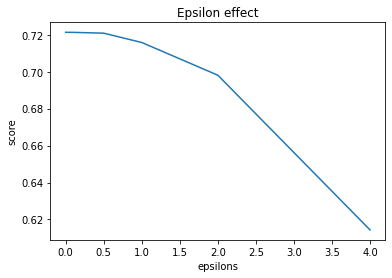

In [ ]:
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = SVR(C=1, cache_size=200, epsilon=0.1, kernel='rbf')

epsilons = [0, 0.01, 0.1, 0.5, 1, 2, 4]
scores = []

for epsilon in epsilons:
    start_time = time.time()
    reg.set_params(epsilon = epsilon)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("Regression with epsilon ", epsilon, "and score: ", score)
    print("Time of execution: ", time.time() - start_time, "seconds")
    scores.append(reg.score(X_test, y_test))

plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilons")
plt.ylabel("score")
plt.show()

# SVR C test

Regression with C  10 and score:  0.7213637678508715
Regression with C  20 and score:  0.7213646336850346
Regression with C  30 and score:  0.7213627730263783
Regression with C  40 and score:  0.7213635052645782
Regression with C  50 and score:  0.721366621241895
Regression with C  60 and score:  0.721366141041464
Regression with C  70 and score:  0.7213629276337369
Regression with C  80 and score:  0.7213623255351538
Regression with C  90 and score:  0.7213611404644906


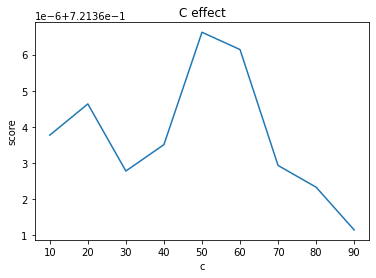

In [ ]:
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = SVR(C=1, cache_size=200, epsilon=0, kernel='rbf')

cs = np.arange(10, 100, 10)
scores = []

for c in cs:
    reg.set_params(C = c)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    print("Regression with C ", c, "and score: ", score)
    scores.append(reg.score(X_test, y_test))

plt.plot(cs, scores)
plt.title("C effect")
plt.xlabel("c")
plt.ylabel("score")
plt.show()

# Decision tree regressor

In [ ]:
print("Decision tree regressor \n")

start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_train, y_train)
print("Decision tree score: ", regr.score(X_test, y_test))
exec_time = time.time() - start
print("Execution time: ", exec_time)


Decision tree regressor 

Decision tree score:  0.721770120426478
Execution time:  0.03259921073913574


# Random forest regressor

In [ ]:
print("Random forest regressor \n")

start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regr = RandomForestRegressor(max_depth = 2, random_state = 0)
regr.fit(X_train,y_train)
print("Random forest regressor score: ", regr.score(X_test, y_test))
exec_time = time.time() - start
print("Exec time: ", exec_time)

Random forest regressor 

Random forest regressor score:  0.6853272465870539
Exec time:  0.723644495010376


# Finding best parameters for random forest regressor

In [ ]:
print("Random forest regressor with best params")

start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regr_model = RandomForestRegressor()

tuned_parameters = {
 'n_estimators': [50, 100, 250, 300],
 'max_depth': [None, 100, 200, 300, 400]
 }
 
regr = GridSearchCV(regr_model, tuned_parameters)
regr.fit(X_train, y_train)
print(regr.best_score_)
print(regr.best_params_)
exec_time = time.time() - start
print("Exec time: ", exec_time)


Random forest regressor with best params
0.7234004290077604
{'max_depth': 300, 'n_estimators': 50}
Exec time:  147.81057024002075


# Logistic regression

Logistic 

Logistic R^2:  0.5060333333333333

 Confusion matrix 

[[6618 8375]
 [6444 8563]]

 Classification report 

              precision    recall  f1-score   support

           0       0.51      0.44      0.47     14993
           1       0.51      0.57      0.54     15007

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.50     30000
weighted avg       0.51      0.51      0.50     30000

Time of execution:  0.14763188362121582 seconds


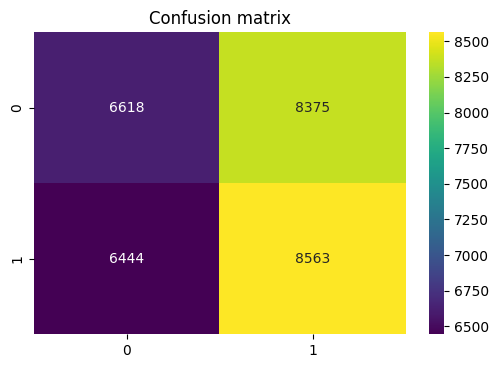

In [ ]:
start_time = time.time()

X = data[['FGA','MP']]
y = data['W/L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model = LogisticRegression(solver = "liblinear", random_state = 0).fit(X_train,y_train)
print("Logistic \n")
y_pred = model.predict(X_test)
print("Logistic R^2: ", model.score(X_test,y_test))
print("\n Confusion matrix \n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification report \n")
print(classification_report(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

# kNN

kNN score without cross-validation:  0.499
Time of execution:  14.469719886779785 seconds


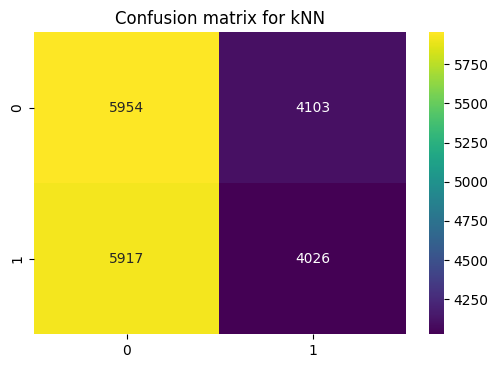

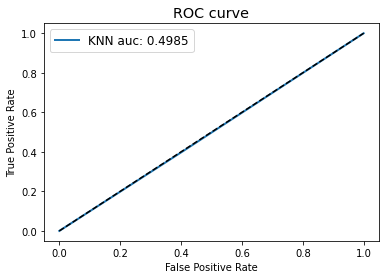

Exec time  4.478180170059204
Cross-validation scores: [0.49875  0.505875 0.503625 0.504625 0.510125 0.496875 0.511875 0.502625
 0.495375 0.505125]
Average cross-validation score:  0.5034875


In [ ]:
X = data[['FGA','MP']]
y = data['W/L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('kNN score without cross-validation: ',accuracy_score(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix for kNN")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
knn_auc = auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, label = 'KNN auc: %0.4f' %knn_auc)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
start = time.time()
scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
exec_time = time.time()-start
print("Exec time ", exec_time)
print('Cross-validation scores:', scores)
print('Average cross-validation score: ',scores.mean())


# SVC Linear kernel

KERNEL: linear
Score 0.5042
training score:  0.502
[[ 4398 15631]
 [ 4201 15770]]
Time of execution:  214.3196897506714 seconds


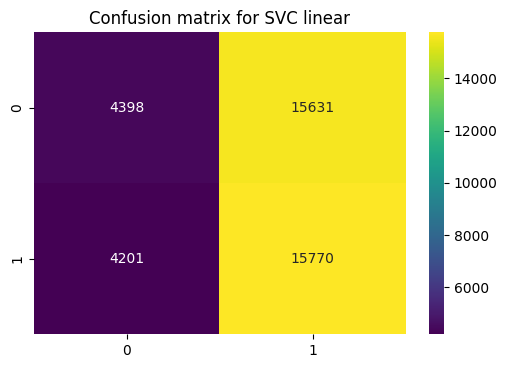

              precision    recall  f1-score   support

           0       0.51      0.22      0.31     20029
           1       0.50      0.79      0.61     19971

    accuracy                           0.50     40000
   macro avg       0.51      0.50      0.46     40000
weighted avg       0.51      0.50      0.46     40000



/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


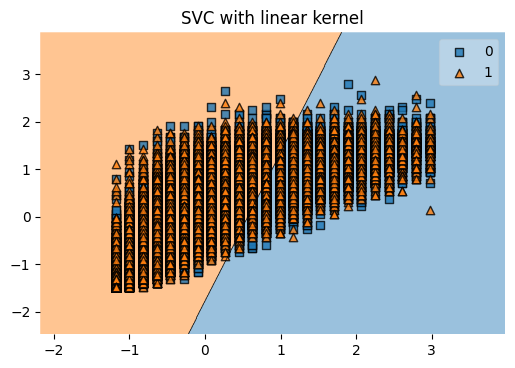

In [ ]:
start_time = time.time()

X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc=SVC(kernel = 'linear', gamma = 'scale') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("KERNEL: linear")
score = metrics.accuracy_score(y_test,y_pred)
print("Score", score)
print("training score: ", metrics.accuracy_score(y_train,svc.predict(X_train)))
print(confusion_matrix(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")


cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix for SVC linear")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()


print(classification_report(y_test, y_pred))
plt.figure(dpi=100)
plot_decision_regions(X = X_test, y = y_test.values, clf = svc)
plt.title("SVC with linear kernel")
plt.show()

# SVC Polynomial kernel

KERNEL: polynomial
Score 0.500475
[[19835   194]
 [19787   184]]
              precision    recall  f1-score   support

           0       0.50      0.99      0.67     20029
           1       0.49      0.01      0.02     19971

    accuracy                           0.50     40000
   macro avg       0.49      0.50      0.34     40000
weighted avg       0.49      0.50      0.34     40000

Time of execution:  198.2244348526001 seconds


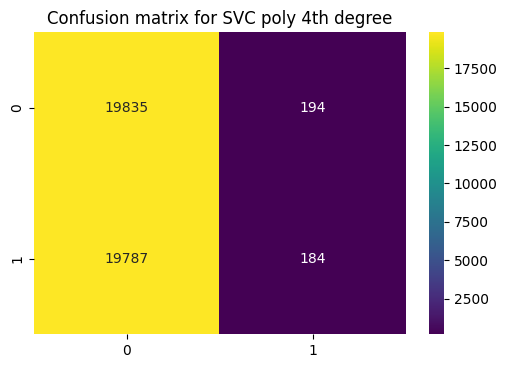

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


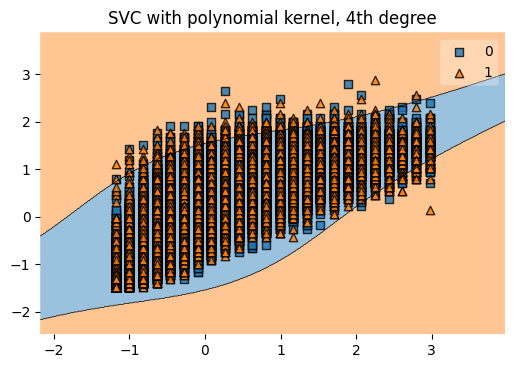

In [12]:
start_time = time.time()
X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc=SVC(kernel = 'poly', gamma = 'scale', degree=4) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)

print("KERNEL: polynomial")
print("Score", score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")


cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix for SVC poly 4th degree")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

plt.figure(dpi=100)
plot_decision_regions(X = X_test, y = y_test.values, clf = svc)
plt.title("SVC with polynomial kernel, 4th degree")
plt.show()

# SVC rbf kernel

KERNEL: rbf
Score 0.513575
[[11886  8143]
 [11314  8657]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.55     20029
           1       0.52      0.43      0.47     19971

    accuracy                           0.51     40000
   macro avg       0.51      0.51      0.51     40000
weighted avg       0.51      0.51      0.51     40000

Time of execution:  279.84572982788086 seconds


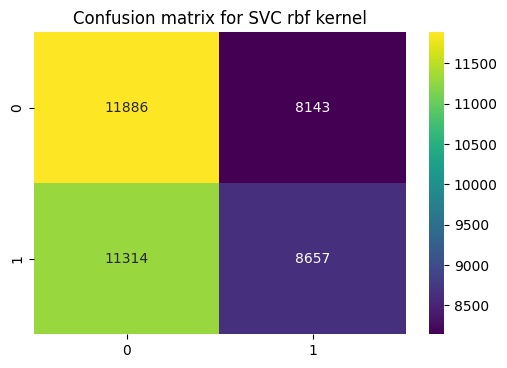

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


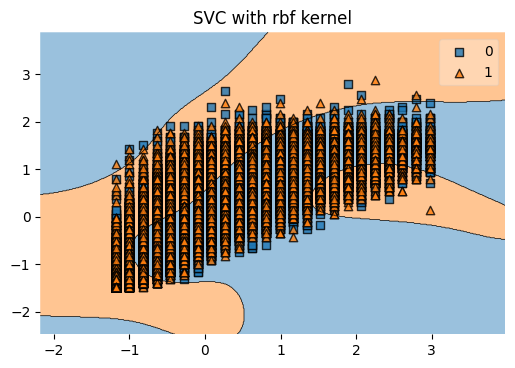

In [ ]:
start_time = time.time()

X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc=SVC(kernel = 'rbf', gamma = 'scale') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)

print("KERNEL: rbf")
print("Score", score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")


cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix for SVC rbf kernel")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

plt.figure(dpi=100)
plot_decision_regions(X = X_test, y = y_test.values, clf = svc)
plt.title("SVC with rbf kernel")
plt.show()

# SVC Sigmoid kernel

KERNEL: sigmoid
Score 0.509425
[[10119  9910]
 [ 9713 10258]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     20029
           1       0.51      0.51      0.51     19971

    accuracy                           0.51     40000
   macro avg       0.51      0.51      0.51     40000
weighted avg       0.51      0.51      0.51     40000

Time of execution:  190.69026637077332 seconds


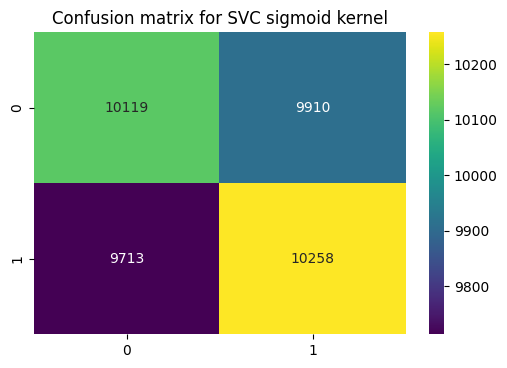

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


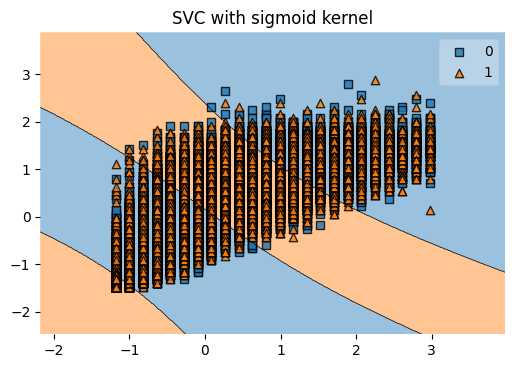

In [ ]:
start_time = time.time()

X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svc=SVC(kernel = 'sigmoid', gamma = 'scale') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)

print("KERNEL: sigmoid")
print("Score", score)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Time of execution: ", time.time() - start_time, "seconds")

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)
plt.figure(dpi=100)
plt.title("Confusion matrix for SVC sigmoid kernel")
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

plt.figure(dpi=100)
plot_decision_regions(X = X_test, y = y_test.values, clf = svc)
plt.title("SVC with sigmoid kernel")
plt.show()

# Decision tree classifier with gini criterion

Decision tree score:  0.51335
[[14900  5129]
 [14337  5634]]
              precision    recall  f1-score   support

           0       0.51      0.74      0.60     20029
           1       0.52      0.28      0.37     19971

    accuracy                           0.51     40000
   macro avg       0.52      0.51      0.49     40000
weighted avg       0.52      0.51      0.49     40000

Execution time:  0.17577409744262695


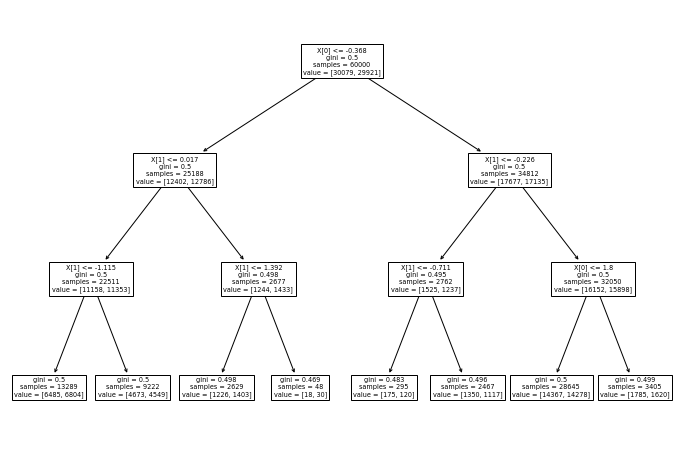

In [ ]:
start = time.time()
X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


dec_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 5, random_state=0)
dec_gini.fit(X_train, y_train)
y_pred=dec_gini.predict(X_test)
print("Decision tree score: ", dec_gini.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
exec_time = time.time() - start
print("Execution time: ", exec_time)

#plot


plt.figure(figsize=(12,8))
tree.plot_tree(dec_gini.fit(X_train, y_train)) 
plt.show()

# Decision tree classifier with entropy criterion

Decision tree entropy score:  0.51335
[[14900  5129]
 [14337  5634]]
              precision    recall  f1-score   support

           0       0.51      0.74      0.60     20029
           1       0.52      0.28      0.37     19971

    accuracy                           0.51     40000
   macro avg       0.52      0.51      0.49     40000
weighted avg       0.52      0.51      0.49     40000

Execution time:  0.15114760398864746


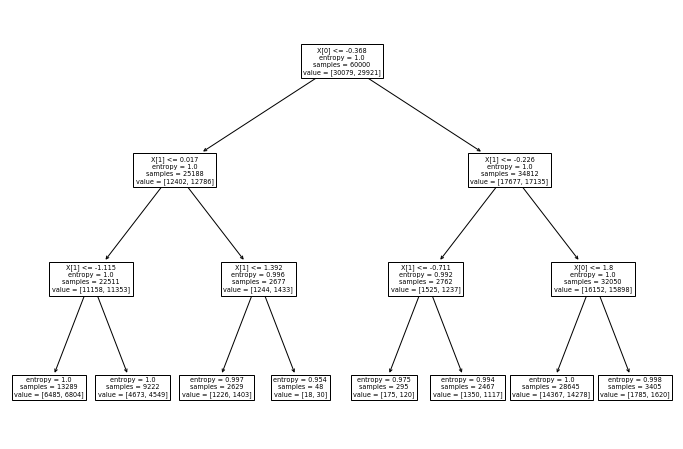

In [ ]:
start = time.time()
X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


dec_entr = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 5, random_state=0)
dec_entr.fit(X_train, y_train)
y_pred=dec_entr.predict(X_test)
print("Decision tree entropy score: ", dec_entr.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
exec_time = time.time() - start
print("Execution time: ", exec_time)

#plot


plt.figure(figsize=(12,8))
tree.plot_tree(dec_entr.fit(X_train, y_train)) 
plt.show()

# Random forest classifier default params

In [ ]:
start = time.time()
X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random forest classifier with default params score: ", rfc.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
exec_time = time.time() - start
print("Exec time: ", exec_time)

Random forest classifier with default params score:  0.5109
[[ 8931 11098]
 [ 8466 11505]]
              precision    recall  f1-score   support

           0       0.51      0.45      0.48     20029
           1       0.51      0.58      0.54     19971

    accuracy                           0.51     40000
   macro avg       0.51      0.51      0.51     40000
weighted avg       0.51      0.51      0.51     40000

Exec time:  4.354202508926392


# Random forest classifier modified params

In [ ]:
start = time.time()
X = data[['FGA','MP']]
y = data['W/L']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random forest classifier with modified params score: ", rfc.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
exec_time = time.time() - start
print("Exec time: ", exec_time)

Random forest classifier with modified params score:  0.51055
[[ 9015 11014]
 [ 8564 11407]]
              precision    recall  f1-score   support

           0       0.51      0.45      0.48     20029
           1       0.51      0.57      0.54     19971

    accuracy                           0.51     40000
   macro avg       0.51      0.51      0.51     40000
weighted avg       0.51      0.51      0.51     40000

Exec time:  8.033482789993286


# Decision tree regressor

In [ ]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regr = DecisionTreeRegressor(random_state = 0)
regr.fit(X_train, y_train)
print("Decision tree score: ", regr.score(X_test, y_test))
exec_time = time.time() - start
print("Execution time: ", exec_time)

Decision tree score:  0.721770120426478
Execution time:  0.0340886116027832


# Random forest regressor

In [ ]:
start = time.time()
X = data['MP'].values.reshape(-1, 1)
y = data['FGA']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regr = RandomForestRegressor(max_depth = 2, random_state = 0)
regr.fit(X_train,y_train)
print("Random forest regressor score: ", regr.score(X_test, y_test))
exec_time = time.time() - start
print("Exec time: ", exec_time)

Random forest regressor score:  0.6853272465870539
Exec time:  0.9407427310943604


# PCA and TSNE

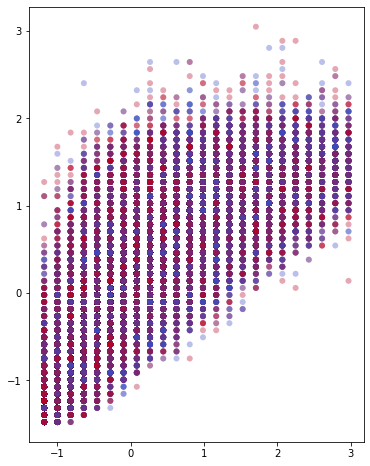

PCA
Exec time: 0.04447746276855469
tSNE


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exec time: 881.9401702880859


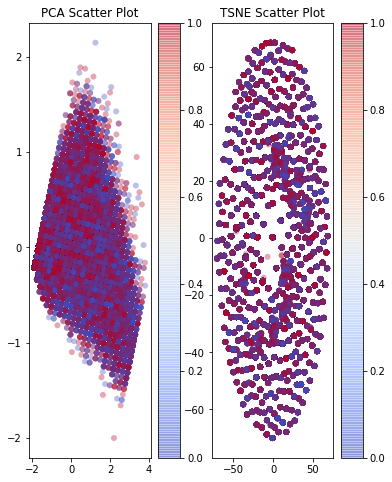

In [ ]:
X = data[['FGA','MP']].values
y = data['W/L']
scaler = StandardScaler()

X = scaler.fit_transform(X)

plt.figure(figsize = (6,8))
plt.scatter(X[:,0],X[:,1], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.show()

#PCA

print("PCA")
start = time.time()
pca = PCA(n_components=2)
pca_p = pca.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

#tSNE

print("tSNE")
start = time.time()
tsne = TSNE(n_components=2)
tsne_p = tsne.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

#Ploting data with PCA and tSNE

plt.figure(figsize = (6,8))
plt.subplot(121)
plt.scatter(pca_p[:,0],pca_p[:,1], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_p[:,0],tsne_p[:,1],  c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# TSNE's with two components

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exec time: 998.6125831604004


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exec time: 909.7161688804626


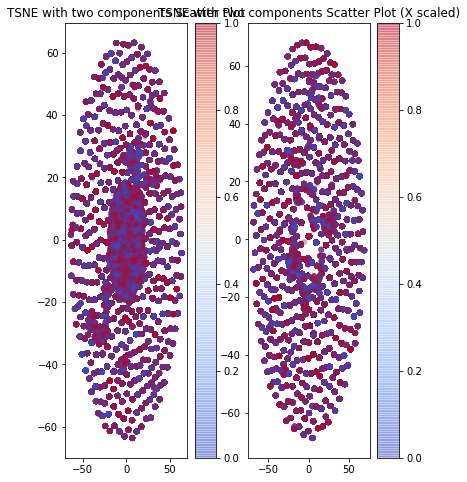

In [ ]:
X = data[['FGA','MP']].values
y = data['W/L']

start = time.time()
tsne = TSNE(n_components=2)
tsne_p = tsne.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

X = data[['FGA','MP']].values
y = data['W/L']
scaler = StandardScaler()
X = scaler.fit_transform(X)

start = time.time()
tsnes = TSNE(n_components=2)
tsnes_p = tsnes.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

plt.figure(figsize = (6,8))
plt.subplot(121)
plt.scatter(tsne_p[:,0],tsne_p[:,1], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE with two components Scatter Plot')
plt.subplot(122)
plt.scatter(tsnes_p[:,0],tsnes_p[:,1],  c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE with two components Scatter Plot (X scaled)')
plt.show()

# TSNE's with three components

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exec time: 6792.918759584427


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exec time: 4114.69473028183


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


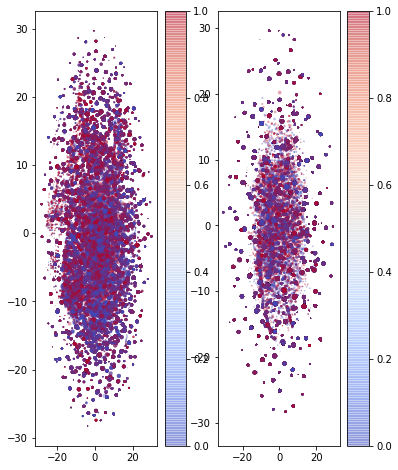

In [ ]:
X = data[['FGA','MP','PTS']].values
y = data['W/L']

start = time.time()
tsne = TSNE(n_components=3)
tsne_p = tsne.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

X = data[['FGA','MP']].values
y = data['W/L']
scaler = StandardScaler()
X = scaler.fit_transform(X)

start = time.time()
tsnes = TSNE(n_components=3)
tsnes_p = tsnes.fit_transform(X)
exec_time = time.time()-start
print("Exec time:", exec_time)

plt.figure(figsize = (6,8))
plt.subplot(121)
plt.scatter(tsne_p[:,0],tsne_p[:,1], tsne_p[:,2], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()

plt.subplot(122)
plt.scatter(tsnes_p[:,0],tsnes_p[:,1], tsnes_p[:,2],  c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()

plt.show()

In [6]:
X = data[['MP', 'PTS']]
X_1 = X.copy()

# Elbow method

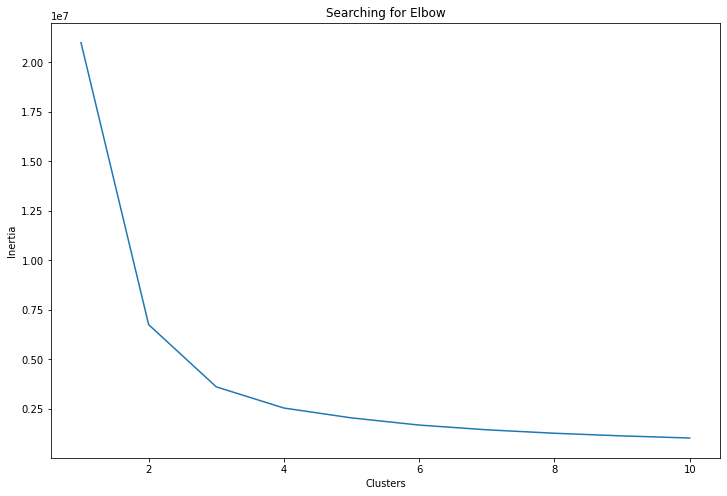

In [29]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_1)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [7]:
X_k2 = X.copy()
X_k3 = X.copy()
X_a2 = X.iloc[:30000].copy()
X_a3 = X.iloc[:30000].copy()

# kMeans with 2 clusters

Centroids:  [[ 6.39387925  1.89235696]
 [27.75838589 12.88222929]]
0.6100047050362262


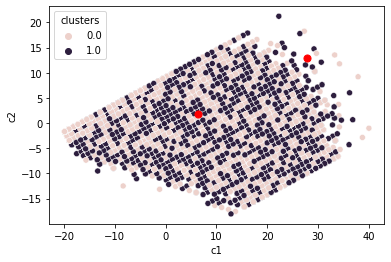

In [31]:
kmeans = KMeans(n_clusters=2).fit(X_k2)
centroids= kmeans.cluster_centers_
X_k2['Labels'] = kmeans.labels_.astype(float)
data['clusters'] = kmeans.fit_predict(X_k2)
reduced_data = PCA(n_components=2).fit_transform(X_k2)
results = pd.DataFrame(reduced_data,columns=['c1','c2'])
print("Centroids: ", centroids)

score = davies_bouldin_score(X_k2, X_k2['Labels'])
print(score)
sns.scatterplot(x="c1", y="c2", hue=data['clusters'], data=results)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# kMeans with 3 clusters

Centroids:  [[19.51596777  6.67910229]
 [ 2.56339835  0.71614643]
 [31.78002501 16.50412629]]
0.6800155201989435


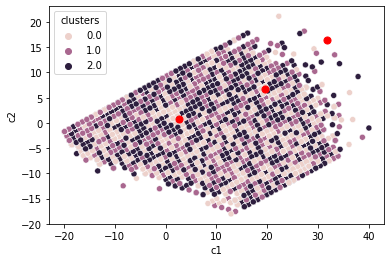

In [32]:
kmeans = KMeans(n_clusters=3).fit(X_k3)
centroids= kmeans.cluster_centers_
X_k3['Labels'] = kmeans.labels_.astype(float)
data['clusters'] = kmeans.fit_predict(X_k3)
reduced_data = PCA(n_components=2).fit_transform(X_k3)
results = pd.DataFrame(reduced_data,columns=['c1','c2'])
print("Centroids: ", centroids)

score = davies_bouldin_score(X_k3, X_k3['Labels'])
print(score)
sns.scatterplot(x="c1", y="c2", hue=data['clusters'], data=results)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Agglomerative clustering with 2 clusters

0.6872315810783166


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


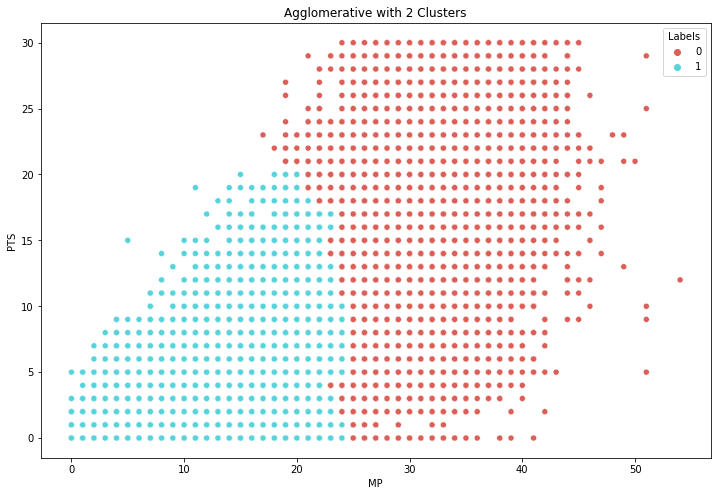

In [9]:
agglom = AgglomerativeClustering(n_clusters=2, linkage='average').fit(X_a2)

X_a2['Labels'] = agglom.labels_

score = davies_bouldin_score(X_a2, X_a2['Labels'])
print(score)

plt.figure(figsize=(12, 8))
sns.scatterplot(X_a2['MP'], X_a2['PTS'], hue=X_a2['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('Agglomerative with 2 Clusters')
plt.show()

# Agglomerative clustering with 3 clusters

0.726256757000454


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


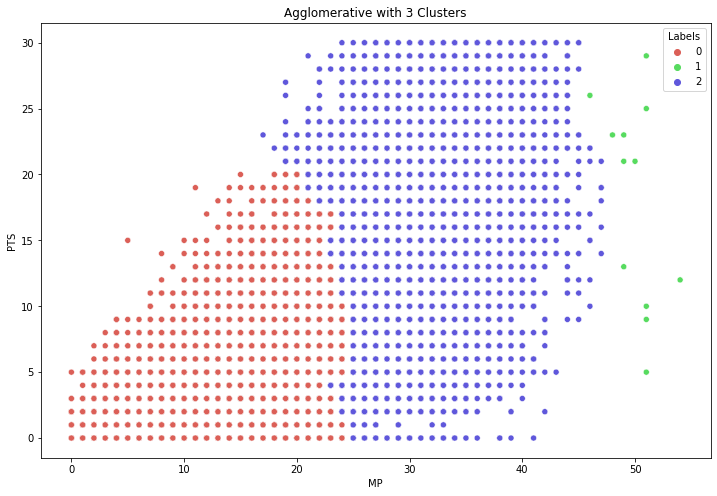

In [10]:
agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_a3)

X_a3['Labels'] = agglom.labels_

score = davies_bouldin_score(X_a3, X_a3['Labels'])
print(score)

plt.figure(figsize=(12, 8))
sns.scatterplot(X_a3['MP'], X_a3['PTS'], hue=X_a3['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters')
plt.show()